In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv("Forest_fire.csv")
df.head(8)

,Area,Oxygen,Temperature,Humidity,Fire Occurrence
0,Jharkand,40,45,20,1
1,Bangalore,50,30,10,1
2,Ecuador,10,20,70,0
3,a,60,45,70,1
4,Bangalore,30,48,10,1
5,c,50,15,30,0
6,de,5,35,35,0
7,asd,5,20,70,0


In [40]:
df.isnull().sum()

Area               10
Oxygen              0
Temperature         0
Humidity            0
Fire Occurrence     0
dtype: int64

In [55]:
data=df.drop('Area',axis=1)
data

,Oxygen,Temperature,Humidity,Fire Occurrence
0,40,45,20,1
1,50,30,10,1
2,10,20,70,0
3,60,45,70,1
4,30,48,10,1
5,50,15,30,0
6,5,35,35,0
7,5,20,70,0
8,60,32,19,1
9,30,50,45,1


In [44]:
df.describe()

,Oxygen,Temperature,Humidity,Fire Occurrence
count,39.000000,39.000000,39.000000,39.000000
mean,33.846154,33.794872,36.282051,0.512821
std,23.734872,16.225677,28.046905,0.506370
min,0.000000,0.000000,0.000000,0.000000
25%,11.500000,20.000000,13.500000,0.000000
50%,30.000000,35.000000,30.000000,1.000000
75%,50.000000,45.000000,62.500000,1.000000
max,89.000000,60.000000,100.000000,1.000000


<AxesSubplot:xlabel='Fire Occurrence', ylabel='count'>

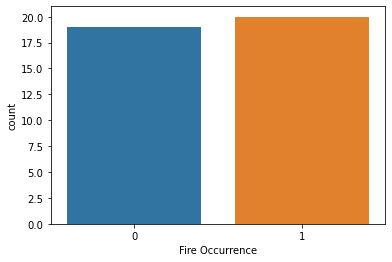

In [56]:
sns.countplot(x="Fire Occurrence",data=data)

# Correlation matrix 

Text(0.5, 1.0, 'Correlation Matrix (for forest fire prediction)')

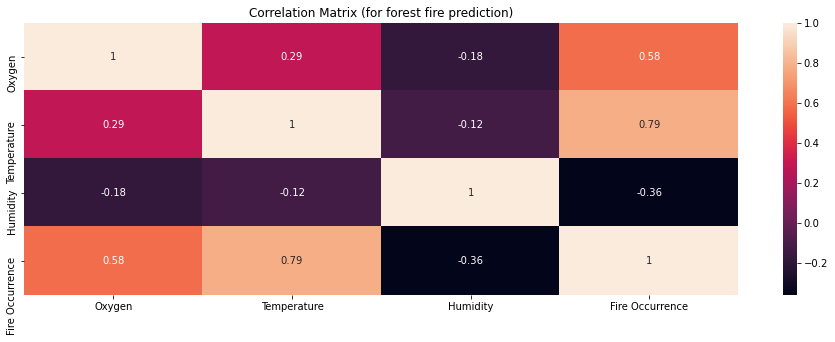

In [57]:
plt.figure(figsize=(16,5))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation Matrix (for forest fire prediction)')

Our outcome is highly correlated with temperature and oxygen

#  Data splitting

In [58]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [60]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

lr_prediction = lr_model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression accuracy =  1.0


In [61]:
svm_model = svm.SVC()
svm_model.fit(X_train,y_train)

svc_prediction = svm_model.predict(X_test)
print('SVM accuracy = ', metrics.accuracy_score(svc_prediction,y_test))

SVM accuracy =  1.0


In [62]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

dt_prediction = dt_model.predict(X_test)
print('Decision Tree accuracy = ', metrics.accuracy_score(dt_prediction,y_test))

Decision Tree accuracy =  0.8333333333333334


In [63]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

knn_prediction =knn_model.predict(X_test)
print('KNN accuracy = ', metrics.accuracy_score(knn_prediction,y_test))

KNN accuracy =  0.8333333333333334


In [64]:
rf_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_model.fit(X_train, y_train)

rf_prediction=rf_model.predict(X_test)
print('random forest accuracy = ',metrics.accuracy_score(rf_prediction,y_test))

random forest accuracy =  0.8333333333333334


# The outcome is heavily depend on temperature and Oxygen


# Logistic Regression and support vector machine holds high accuracy for our model 

In [66]:
import pickle
pickle.dump(lr_model,open('ffp_model.pkl','wb'))

we dumped this model to a pickel file for creating web page